In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

In [2]:
df = pd.read_csv('Advertising_Sales.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
# create a dataset function 
def dataset(df):
    df = df.copy()
    X = df.drop('Sales', axis=1)
    y = df['Sales']
    return X, y

In [4]:
X, y = dataset(df)

In [5]:
# preprocess the data using a function
def preprocess_dataset(X,y, random_state = 3):
    X = X.copy()
    y = y.copy()
    # split the data into train and test sets
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = random_state)
    # scale the data
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train, X_test, y_train, y_test

In [6]:
X_train, X_test, y_train, y_test = preprocess_dataset(X,y)

In [7]:
# create a function to train the model and return the score of the model on the test set
def train_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    # training score
    train_score = model.score(X_train, y_train)
    # round the score to 2 decimal places
    train_score = round(train_score, 2)
    # test score
    test_score = model.score(X_test, y_test)
    # round the score to 2 decimal places
    test_score = round(test_score, 2)
    return train_score, test_score

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [9]:
model1 = train_model(model = LinearRegression(), X_train = X_train, X_test = X_test, y_train = y_train, y_test = y_test)
model2 = train_model(model = Ridge(), X_train = X_train, X_test = X_test, y_train = y_train, y_test = y_test)
model3 = train_model(model = Lasso(), X_train = X_train, X_test = X_test, y_train = y_train, y_test = y_test)
model4 = train_model(model = ElasticNet(), X_train = X_train, X_test = X_test, y_train = y_train, y_test = y_test)
model5 = train_model(model = RandomForestRegressor(), X_train = X_train, X_test = X_test, y_train = y_train, y_test = y_test)
model6 = train_model(model = GradientBoostingRegressor(), X_train = X_train, X_test = X_test, y_train = y_train, y_test = y_test)
model7 = train_model(model = SVR(), X_train = X_train, X_test = X_test, y_train = y_train, y_test = y_test)
model8 = train_model(model = KNeighborsRegressor(), X_train = X_train, X_test = X_test, y_train = y_train, y_test = y_test)
model9 = train_model(model = DecisionTreeRegressor(), X_train = X_train, X_test = X_test, y_train = y_train, y_test = y_test)

In [10]:
model1_train_score, model1_test_score = model1
print("Training score and test score for Linear Regression model are:")
print(model1_train_score, model1_test_score)
model2_train_score, model2_test_score = model2
print("Training score and test score for Ridge Regression model are:")
print(model2_train_score, model2_test_score)
model3_train_score, model3_test_score = model3
print("Training score and test score for Lasso Regression model are:")
print(model3_train_score, model3_test_score)
model4_train_score, model4_test_score = model4
print("Training score and test score for ElasticNet Regression model are:")
print(model4_train_score, model4_test_score)
model5_train_score, model5_test_score = model5
print("Training score and test score for Random Forest Regression model are:")
print(model5_train_score, model5_test_score)
model6_train_score, model6_test_score = model6
print("Training score and test score for Gradient Boosting Regression model are:")
print(model6_train_score, model6_test_score)
model7_train_score, model7_test_score = model7
print("Training score and test score for Support Vector Regression model are:")
print(model7_train_score, model7_test_score)
model8_train_score, model8_test_score = model8
print("Training score and test score for K Neighbors Regression model are:")
print(model8_train_score, model8_test_score)
model9_train_score, model9_test_score = model9
print("Training score and test score for Decision Tree Regression model are:")
print(model9_train_score, model9_test_score)

Training score and test score for Linear Regression model are:
0.9 0.88
Training score and test score for Ridge Regression model are:
0.9 0.88
Training score and test score for Lasso Regression model are:
0.82 0.77
Training score and test score for ElasticNet Regression model are:
0.74 0.68
Training score and test score for Random Forest Regression model are:
1.0 0.97
Training score and test score for Gradient Boosting Regression model are:
1.0 0.97
Training score and test score for Support Vector Regression model are:
0.94 0.84
Training score and test score for K Neighbors Regression model are:
0.97 0.91
Training score and test score for Decision Tree Regression model are:
1.0 0.93


In [13]:
# create a dataframe to store the model scores
model_scores = pd.DataFrame({'Linear Regression': model1,
                             'Ridge Regression': model2,
                             'Lasso Regression': model3,
                             'ElasticNet Regression': model4,
                             'Random Forest Regression': model5,
                             'Gradient Boosting Regression': model6,
                             'Support Vector Regression': model7,
                             'K Neighbors Regression': model8,
                             'Decision Tree Regression': model9})
model_scores
# 0 index as Training score and 1 index as Test score
model_scores = model_scores.T
model_scores.columns = ['Training score', 'Test score']
model_scores

,Training score,Test score
Linear Regression,0.90,0.88
Ridge Regression,0.90,0.88
Lasso Regression,0.82,0.77
ElasticNet Regression,0.74,0.68
Random Forest Regression,1.00,0.97
Gradient Boosting Regression,1.00,0.97
Support Vector Regression,0.94,0.84
K Neighbors Regression,0.97,0.91
Decision Tree Regression,1.00,0.93


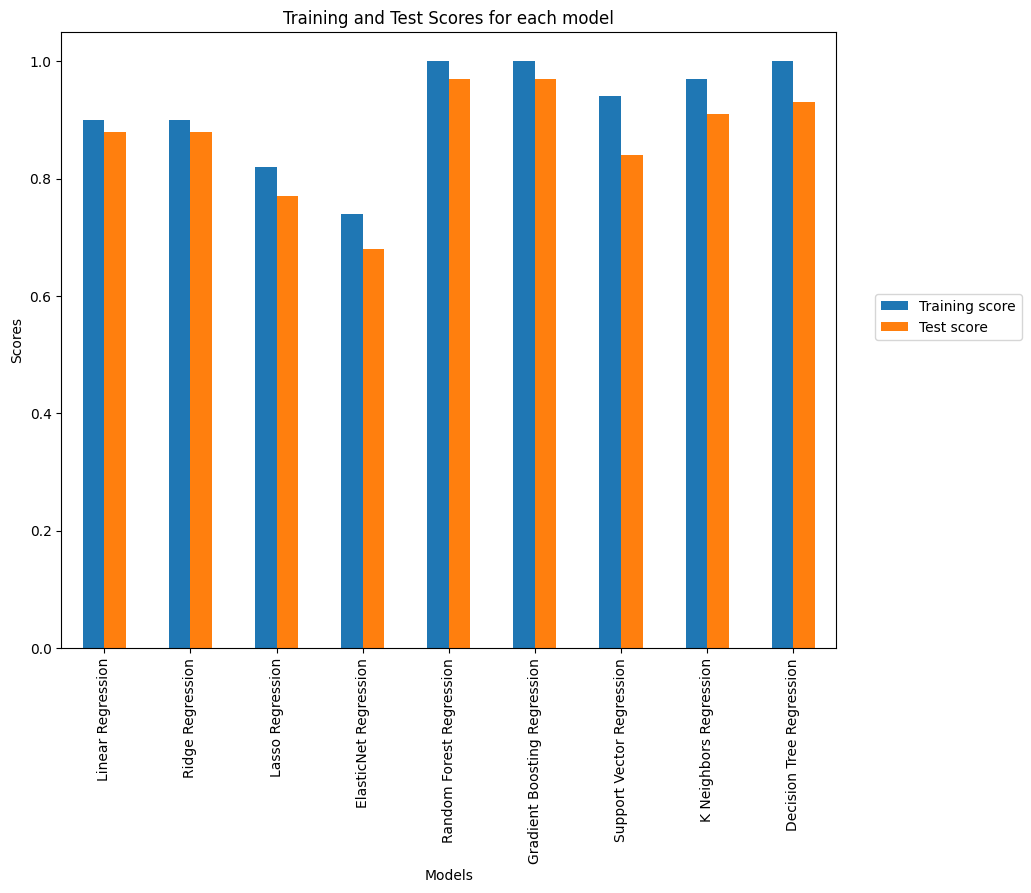

In [15]:
# plot the training and test scores for each model 
fig, ax = plt.subplots(figsize=(10,8))
model_scores.plot(kind='bar', ax=ax)
ax.set(title='Training and Test Scores for each model',
       xlabel='Models',
       ylabel='Scores')
ax.legend(loc=(1.05,0.5))
plt.show()

In [16]:
# compare the models and tell which model is the best for this dataset 
def best_model(model_scores):
    model_scores = model_scores.copy()
    # sort the values in ascending order
    model_scores = model_scores.sort_values(by='Test score', ascending=False)
    return model_scores

best_model(model_scores)

,Training score,Test score
Random Forest Regression,1.00,0.97
Gradient Boosting Regression,1.00,0.97
Decision Tree Regression,1.00,0.93
K Neighbors Regression,0.97,0.91
Linear Regression,0.90,0.88
Ridge Regression,0.90,0.88
Support Vector Regression,0.94,0.84
Lasso Regression,0.82,0.77
ElasticNet Regression,0.74,0.68
